In [2]:
from scipy.interpolate import interp1d, CubicSpline, lagrange
import numpy.polynomial.polynomial as poly
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# Numerical Analysis Topics

This notebook will be a bit more sporadic than the other two. The intention here is to just cover things that I have seen pop up within my reading online and also in the context of work. 

# Interpolation
I have heard the term before, yes, but not in the context of numerical analysis and in things like meshing. 

Python Programming and Numerical Methods has a whole chapter dedicated to it, so I will be doing most of my programming and note taking based off of information from that.

They state that the use case for interpolation is that you have n amount of points and a function that "goes through" them. Let's say then, that you are given another data point and want to know how to graph it...what do you do? You can use interpolation to find out an estimation of what its value is.

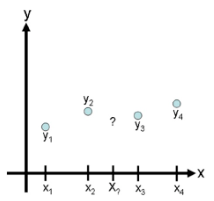

Above is a picture demonstrating this. We are concerned with that ? between y2 and y3. I will go through a few different methods.

## Linear Interpolation
The simplest interpolation function assumes that the new point will be somewhere on a straight line joining the closest points to the left and right. Below is the general equation estimating where the next point x will be given that it is between xi and x i+1

\begin{equation}
interped(x)={y_i}+\frac{({y_{i+1}}−{y_i})(x−{x_i})}{({x_{i+1}}−{x_i})}
\end{equation}

It's good to know how this stuff generally works under the hood, but luckily a library exists that can do the heavy lifting for me. scipy.interpolate has many different functions I can use to do this for me. Linear interpolation can be done using interp1d


### interp1d()
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

Interpolate a 1-D function.

x and y are arrays of values used to approximate some function f: y = f(x). This class returns a function whose call method uses interpolation to find the value of new points.

#### Parameters
* **x(N,) array_like** \
    A 1-D array of real values.

* **y(…,N,…) array_like** \
    A N-D array of real values. The length of y along the interpolation axis must be equal to the length of x.

* **kind str or int, optional** \
    Specifies the kind of interpolation as a string or as an integer specifying the order of the spline interpolator to use. The string has to be one of ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of zeroth, first, second or third order; ‘previous’ and ‘next’ simply return the previous or next value of the point; ‘nearest-up’ and ‘nearest’ differ when interpolating half-integers (e.g. 0.5, 1.5) in that ‘nearest-up’ rounds up and ‘nearest’ rounds down. Default is ‘linear’.

* **axisint, optional** \
    Specifies the axis of y along which to interpolate. Interpolation defaults to the last axis of y.

* **copybool, optional** \
If True, the class makes internal copies of x and y. If False, references to x and y are used. The default is to copy.

* **bounds_errorbool, optional**
If True, a ValueError is raised any time interpolation is attempted on a value outside of the range of x (where extrapolation is necessary). If False, out of bounds values are assigned fill_value. By default, an error is raised unless fill_value="extrapolate".

* **fill_valuearray-like or (array-like, array_like) or “extrapolate”, optional**
 * if a ndarray (or float), this value will be used to fill in for requested points outside of the data range. If not provided, then the default is NaN. The array-like must broadcast properly to the dimensions of the non-interpolation axes.
 * If a two-element tuple, then the first element is used as a fill value for x_new < x[0] and the second element is used for x_new > x[-1]. Anything that is not a 2-element tuple (e.g., list or ndarray, regardless of shape) is taken to be a single array-like argument meant to be used for both bounds as below, above = fill_value, fill_value. Using a two-element tuple or ndarray requires bounds_error=False.
 


In [5]:
x=[0,1,2]
y=[0,3,2]

func=interp1d(x,y) 
func

In [6]:
new_y=func(1.678)

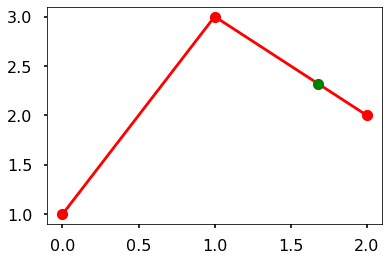

In [31]:
plt.plot(x,y, '-or')
plt.plot(1.678,new_y, 'go')
plt.show()

# Newly interpolated point show in green

## Cubic Spline Interpolation
In cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. Each cubic function requires 4 coefficients and are solved using a system of equations that looks similar to this:

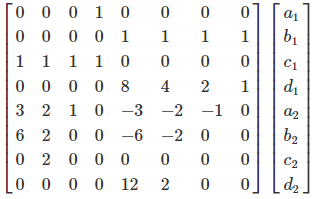

This particular matrix is for finding the cubic spline interpolation at x = 1.5 based on the data x = [0, 1, 2], y = [1, 3, 2].
AS you can see, this is a pretty intense calculation

## CubicSpline()
Cubic spline data interpolator.

Interpolate data with a piecewise cubic polynomial which is twice continuously differentiable [1]. The result is represented as a PPoly instance with breakpoints matching the given data.

**Parameters**
* **x array_like, shape (n,)** \
    1-D array containing values of the independent variable. Values must be real, finite and in strictly increasing order.

* **y array_like**\
    Array containing values of the dependent variable. It can have arbitrary number of dimensions, but the length along axis (see below) must match the length of x. Values must be finite.

* **axis int, optional**\
    Axis along which y is assumed to be varying. Meaning that for x[i] the corresponding values are np.take(y, i, axis=axis). Default is 0.

* **bc_type string or 2-tuple, optional**\
    Boundary condition type. Two additional equations, given by the boundary conditions, are required to determine all coefficients of polynomials on each segment [2].

 *    If bc_type is a string, then the specified condition will be applied at both ends of a spline. Available conditions are:

 *    ‘not-a-knot’ (default): The first and second segment at a curve end are the same polynomial. It is a good default when there is no information on boundary conditions.

 *    ‘periodic’: The interpolated functions is assumed to be periodic of period x[-1] - x[0]. The first and last value of y must be identical: y[0] == y[-1]. This boundary condition will result in y'[0] == y'[-1] and y''[0] == y''[-1].

 *    ‘clamped’: The first derivative at curves ends are zero. Assuming a 1D y, bc_type=((1, 0.0), (1, 0.0)) is the same condition.

 *    ‘natural’: The second derivative at curve ends are zero. Assuming a 1D y, bc_type=((2, 0.0), (2, 0.0)) is the same condition.

    If bc_type is a 2-tuple, the first and the second value will be applied at the curve start and end respectively. The tuple values can be one of the previously mentioned strings (except ‘periodic’) or a tuple (order, deriv_values) allowing to specify arbitrary derivatives at curve ends:

 *    order: the derivative order, 1 or 2.

 *    deriv_value: array_like containing derivative values, shape must be the same as y, excluding axis dimension. For example, if y is 1-D, then deriv_value must be a scalar. If y is 3-D with the shape (n0, n1, n2) and axis=2, then deriv_value must be 2-D and have the shape (n0, n1).

* **extrapolate{bool, ‘periodic’, None}, optional**\
    If bool, determines whether to extrapolate to out-of-bounds points based on first and last intervals, or to return NaNs. If ‘periodic’, periodic extrapolation is used. If None (default), extrapolate is set to ‘periodic’ for bc_type='periodic' and to True otherwise.

In [27]:
x=[0,1,2]
y=[1,3,2]

x1=[0,1,1.5,2]
y1=[4,2,4,3]

"""
What I am doing here is creating two cubic spline functions to demonstrate how they always fit a polynomial, 
and that you don't necessarily have to use just three points. These can get out of hand very quickly because your resulting
system of equations will have 4(n-1) equations to solve (where n= number of points)
"""
f1 = CubicSpline(x,y,bc_type='natural')
f2= CubicSpline(x1,y1,bc_type='natural')
newxpts = np.linspace(0,2,100) # generate 100 points between x=0 and x=2
newypts1 = f1(newxpts)
newypts2 = f2(newxpts)

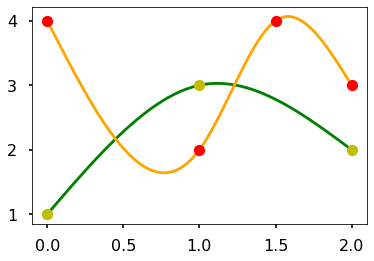

In [32]:
plt.plot(newxpts, newypts1, 'g')
plt.plot(newxpts, newypts2, 'orange')
plt.plot(x,y, 'oy')
plt.plot(x1,y1, 'or')
plt.show()

## Lagrange Polynomial Interpolation
The distinction between this and the cubic spline interpolation is that here, rather than solving for cubic polynomials between subesquen pairs of data points, Lagrange polynomial interpolation finds a single polynomial that goes through all the data points.

If you were to do this by hand, you would see that it is a combination of Lagrange basis polynomials. I will not be doing this because I am unfamiliar with the topic.

### lagrange()
scipy.interpolate.lagrange
scipy.interpolate.lagrange(x, w)[source]
Return a Lagrange interpolating polynomial.

Given two 1-D arrays x and w, returns the Lagrange interpolating polynomial through the points (x, w).

Warning: This implementation is numerically unstable. Do not expect to be able to use more than about 20 points even if they are chosen optimally.

**Parameters**
* **x array_like** \
    x represents the x-coordinates of a set of datapoints.

* **w array_like** \
    w represents the y-coordinates of a set of datapoints, i.e., f(x).

**Returns**
* **lagrange numpy.poly1d instance**\
    The Lagrange interpolating polynomial.

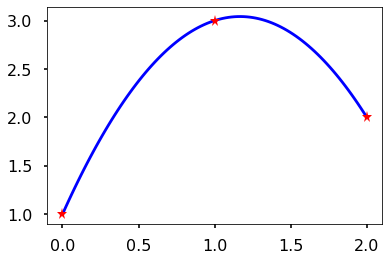

In [40]:
x = [0, 1, 2]
y = [1, 3, 2]

L = lagrange(x, y)
newxpts = np.linspace(0,2,100) # generate 100 points between x=0 and x=2

plt.plot(newxpts, L(newxpts), 'b', x,y,'r*')
plt.show()

## Newton's Polynomial Interpolation
This method creates an n-1 order Newton's polynomial that goes through n points following the below formula

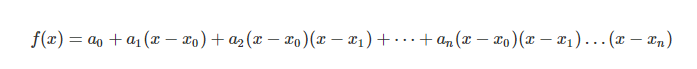

For each coefficient, one takes a "divided difference". After rearranging that above formula, you can get this form:
a0=y0
a0+a1(x1-x0)=y1
a0+a1(x−x0)+a2(x−x0)(x−x1) = y2

which can then be turned into something like this:
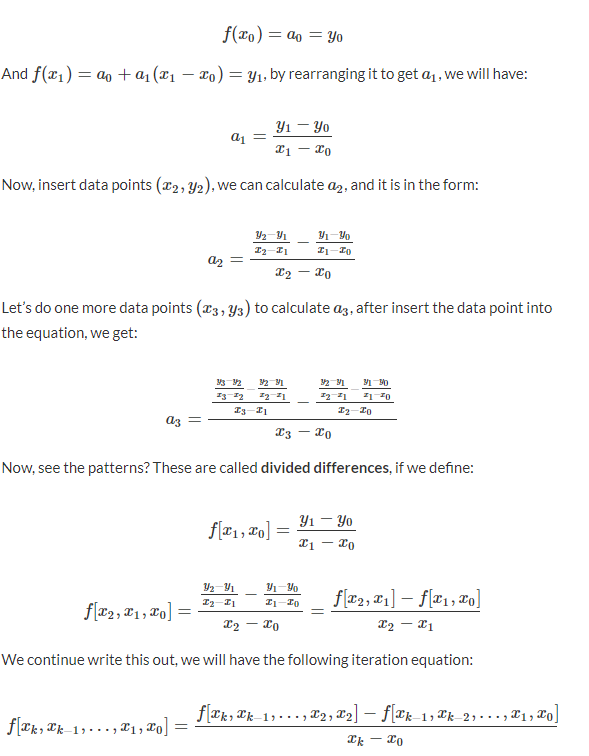

I have taken a program that they wrote in that book that does this automatically for the sake of analyzing

At the end of the execution of divided_diff, a table is made that looks like this:
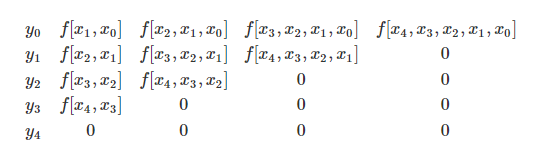

In [46]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i]) # this is basically just finding the differences
                                                            # between the next point and the current point divided
                                                            # by the difference between the x values
            
            # you can imagine coef taking the role of any of the a's above
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

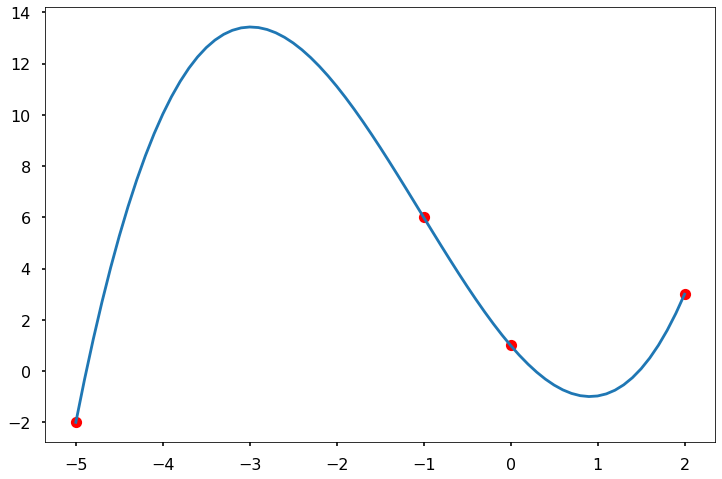

In [48]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.show()

# Numerical Methods
These don't really have any rhyme or reason, but I have heard of them and figured it wouldn't hurt to have a look at them

## Newton-Raphson Method
Let f(x) be a smooth and continuous function and xr be an unknown root of f(x). You can get an approximate answer for the root using 

\begin{equation}
0=f(x_0)+f'(x_0)(x_1-x_0)
\end{equation}

and then rearranging it to the following:

\begin{equation}
x_1=x_0-\frac{f(x_0)}{f'(x_0)}
\end{equation}


A more general form of this is called the **Newton Step** and can use previous guesses to "improve" its current guess. The Newton Raphson Method finds roots by iterating Newton steps until the error is less than the tolerance.

As a side note, this really looks like point slope formula to me. You just let m = the derivative and the x is a specific point. You set Y=0 because you're estimating the root. :

\begin{equation}
y-y_1=+m(x-x_1) \\
y=y_1+m(x-x_1) \\
\end{equation}



In [58]:
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


In [59]:
# A recursive newton raphson solver
f = lambda x: x**3 +3*x**2 - 2*x -5
f_prime = lambda x: 3*x**2 +6*x- 2
def my_newton(f,df,x0,tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol) # each iteration

In [60]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)

estimate = 1.330058752527104


## Finite Differences
Recall that the derivative f′(x) of a function f(x) at the point x=a is defined as:
\begin{equation}
f′(a)=lim_{x→a}\frac{f(x)−f(a)}{x−a}
\end{equation}

The derivative at x=a is the slope at this point. In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point x=a to achieve the goal. 

There are three kinds of finite differences: forward, backward and central differences

<br>

<center>Forward Difference</center>
\begin{equation}
f′(x_j)=\frac{f(x_{j+1})−f(x_{j})}{x_{j+1}-x_j}
\end{equation}

<center>Backward Difference</center>
\begin{equation}
f′(x_j)=\frac{f(x_j)−f(x_{j-1})}{x_j−x_{j-1}}
\end{equation}

<center>Central Difference</center>
\begin{equation}
f′(x_j)=\frac{f(x_{j+1})−f(x_{j-1})}{x_{j+1}−x_{j-1}}
\end{equation}

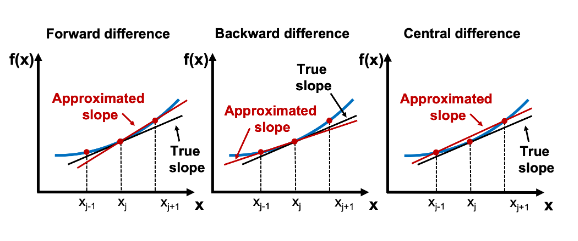

Numpy has a diff method that can calculate these. np.diff(f) produces an array d in which the entries are differences of adjacent lements in initial array f i.e. d(i)=f(i+1)-f(i).

Sounds like a forward difference.

Below is some python code to demonstrate how finite differences can be used to estimate derivatives with great accuracy. We start with cos, calculate differences, and then plot the resulting lines against the actual derivative sin.

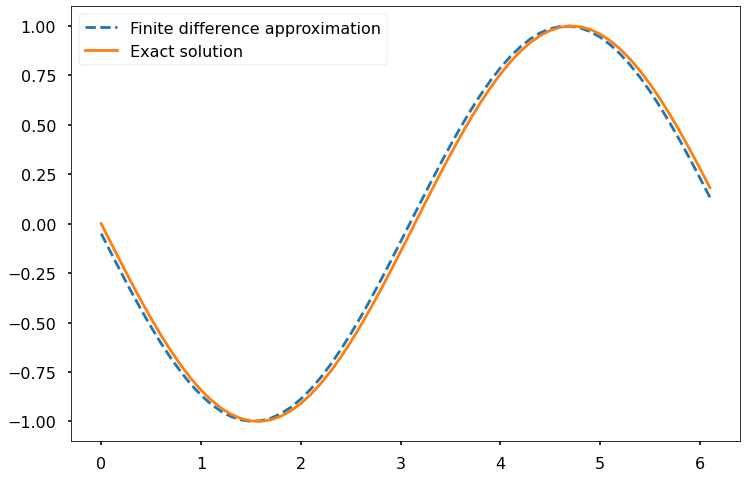

0.049984407218554114


In [61]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

## The Euler Method

https://www.youtube.com/watch?v=v-pbGAts_Fg&ab_channel=mitchellh

The Euler Method is regarded in the book I'm using for reference as one of the "simplest and most intuitive method for solving initial value problems". It also showed up in "Hidden Figures" as a method they used for calculation so it seems like it would be worth it to learn

Let\begin{equation} \frac{dS(t)}{dt}=F(t,S(t))  \end{equation} be an explicitly defined first order ODE.

Let t be a numerical grid of the interval \begin{equation} [ t_0, t_f] \end{equation} with spacing h. Assume t0 = 0 and tf=Nh for some positive integer N.

The linear approximation of S(t) around tj at tj+1 is 
\begin{equation} S(t_{j+1}) =S(t_j)+ (t_{j+1}-t_j)\frac{dS(t_j)}{dt} \end{equation} 

This can be written as 
\begin{equation} S(t_{j+1}) =S(t_j)+ hF(t_j, S(t_j)) \end{equation} 

The accuracy can be affected by how small the h step size is. The smaller, the better.



### Using this Again

Ex. Verify that x = x(t) = cos(t)+sin(t) is a solution of

\begin{equation}
\frac{dx}{dt} +x=2cos(t)
\end{equation}

x(0)=1 is my initial value

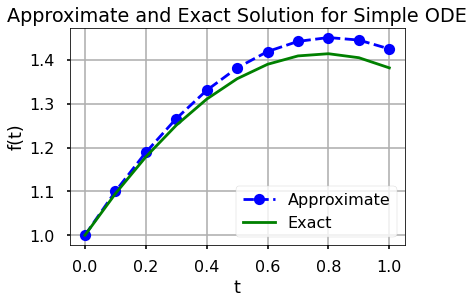

In [22]:
f= lambda t,x: 2*np.cos(t)-x
h1=0.1
t1=np.arange(0,1+h1,h1)
x0=1

s1=np.zeros(len(t1))
s1[0]=x0 # setting initial condition


for i in range(0,len(t1)-1):
    s1[i+1]=s1[i]+h1*f(t1[i],s1[i])

# Borrowed this
plt.plot(t1, s1, 'bo--', label='Approximate')
plt.plot(t1, np.sin(t1)+np.cos(t1), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()